# National Trend

In [1]:
from pathlib import Path

import numpy as np
import seaborn as sns; sns.set(rc={'figure.figsize':(10, 10)})
import pandas as pd

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from src import utils, fitters

In [5]:
df = utils.extract_data(utils.national_data)

In [6]:
df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-21,17708,2857,20565,22116,42681,4821,6072,4825,53578,233222
2020-03-22,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
2020-03-23,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
2020-03-24,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964
2020-03-25,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445


## Total Deceted Positive 

In [7]:
x = utils.get_date_range(df.index)
y = df["totale_casi"].to_numpy()

In [8]:
logistic = fitters.Logistic.fit(x, y, p0=[10, 2, 50000], bounds=([0, 0.1, 50000],[100, 30, np.inf]))

In [9]:
gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)

In [10]:
gompertz = fitters.Gompertz.fit(x, y, p0=[10, 2, 10000], bounds=([1, 0.001, 5000],[np.inf, 5, np.inf]))

Logistic(26.746774805086954, 0.19632894134148166, 113884.96955742955)
Peak:  2020-03-21
10% done: 2020-03-10
25% done: 2020-03-16
50% done: 2020-03-21
75% done: 2020-03-27
95% done: 2020-04-05
Plateau: 113884
GenLogistic(25.503741290909563, 0.1564878566537876, 131108.5127266758, 0.7168255132080373)
Peak:  2020-03-23
10% done: 2020-03-11
25% done: 2020-03-17
50% done: 2020-03-23
75% done: 2020-03-29
95% done: 2020-04-10
Plateau: 131108
Gompertz(126.92811662885957, 0.05423508918427039, 361957.6692411031)
Peak:  2020-04-02
10% done: 2020-03-17
25% done: 2020-03-27
50% done: 2020-04-08
75% done: 2020-04-25
95% done: 2020-05-27
Plateau: 361957


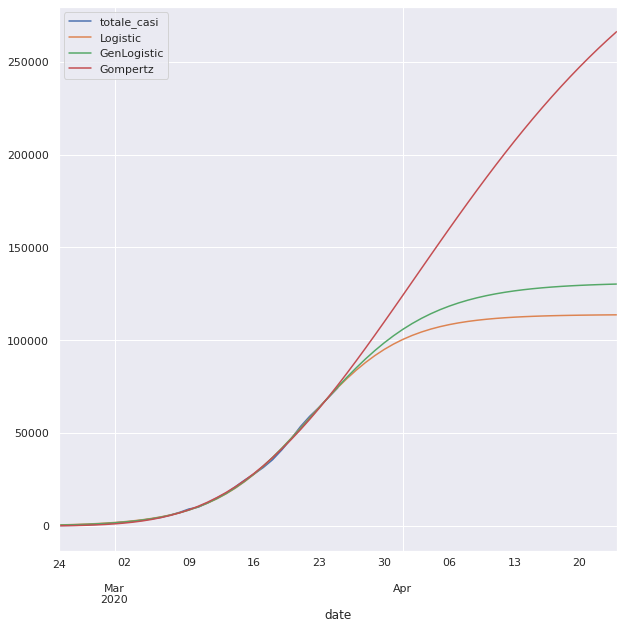

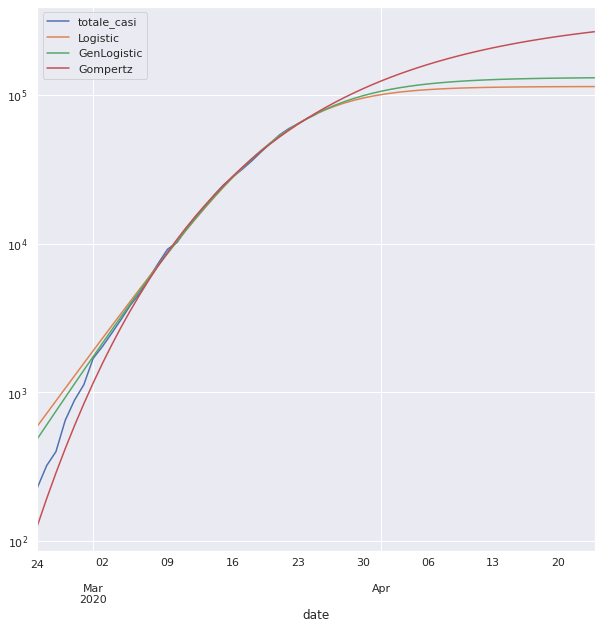

In [11]:
models = [logistic, gen_logistic, gompertz]
mod_df = utils.collect_models(models, df, "totale_casi", 30)
utils.summaries(models, df)
mod_df.plot(); mod_df.plot(logy=True);

## Lockdown effect 

In [12]:
lock_df = df.loc["2020-03-08":,:]
displacement = utils.ndays_since_start("2020-03-08", df)

In [13]:
l_x = utils.get_date_range(lock_df.index) + displacement
l_y = lock_df.totale_casi.to_numpy()

ul_x_cont = np.arange(0, displacement)
l_x_cont = np.arange(displacement, x.max()+30)

In [14]:
l_logistic = fitters.Logistic.fit(l_x, l_y, p0=[10, 2, 50000], bounds=([0, 0.1, 50000],[100, 30, np.inf]))
l_gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)
l_gompertz = fitters.Gompertz.fit(l_x, l_y, p0=[10, 2, 10000], bounds=([1, 0.001, 5000],[np.inf, 5, np.inf]), jac='cs')

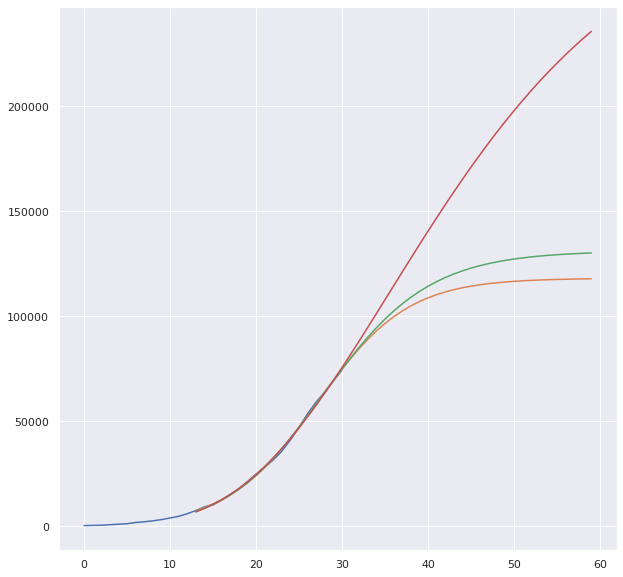

In [15]:
sns.lineplot(x, y)
sns.lineplot(l_x_cont, l_logistic.compute(l_x_cont))
sns.lineplot(l_x_cont, l_gen_logistic.compute(l_x_cont))
sns.lineplot(l_x_cont, l_gompertz.compute(l_x_cont));

In [16]:
utils.summary_of_model(l_logistic, df)
utils.summary_of_model(l_gen_logistic, df)
utils.summary_of_model(l_gompertz, df)

Logistic(27.14730948055287, 0.19089989916634423, 118107.75299760405)
Peak:  2020-03-22
10% done: 2020-03-10
25% done: 2020-03-16
50% done: 2020-03-22
75% done: 2020-03-27
95% done: 2020-04-06
Plateau: 118107
GenLogistic(25.503741290909563, 0.1564878566537876, 131108.5127266758, 0.7168255132080373)
Peak:  2020-03-23
10% done: 2020-03-11
25% done: 2020-03-17
50% done: 2020-03-23
75% done: 2020-03-29
95% done: 2020-04-10
Plateau: 131108
Gompertz(79.82887041790701, 0.05942821956810023, 301842.71752783924)
Peak:  2020-03-30
10% done: 2020-03-16
25% done: 2020-03-24
50% done: 2020-04-05
75% done: 2020-04-20
95% done: 2020-05-19
Plateau: 301842


## Deaths 

In [17]:
x = utils.get_date_range(df.index)
y = df["deceduti"].to_numpy()

In [18]:
logistic = fitters.Logistic.fit(x, y, p0=[10, 2, 5000], bounds=([0, 0.01, 1000],[100, 30, np.inf]))

In [19]:
gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)

In [20]:
gompertz = fitters.Gompertz.fit(x, y, p0=[10, 2, 10000], bounds=([1, 0.001, 1000],[np.inf, 5, np.inf]))

Logistic(28.147013327584016, 0.22355992283082946, 12441.885391441461)
Peak:  2020-03-23
10% done: 2020-03-13
25% done: 2020-03-18
50% done: 2020-03-23
75% done: 2020-03-28
95% done: 2020-04-05
Plateau: 12441
GenLogistic(21.502149342972512, 0.10745472484976493, 22949.301195772885, 0.30369874315808415)
Peak:  2020-03-30
10% done: 2020-03-16
25% done: 2020-03-22
50% done: 2020-03-30
75% done: 2020-04-07
95% done: 2020-04-24
Plateau: 22949
Gompertz(1.7071643768850482, 0.056266685716924884, 51040.073828868335)
Peak:  2020-04-05
10% done: 2020-03-21
25% done: 2020-03-30
50% done: 2020-04-11
75% done: 2020-04-27
95% done: 2020-05-28
Plateau: 51040


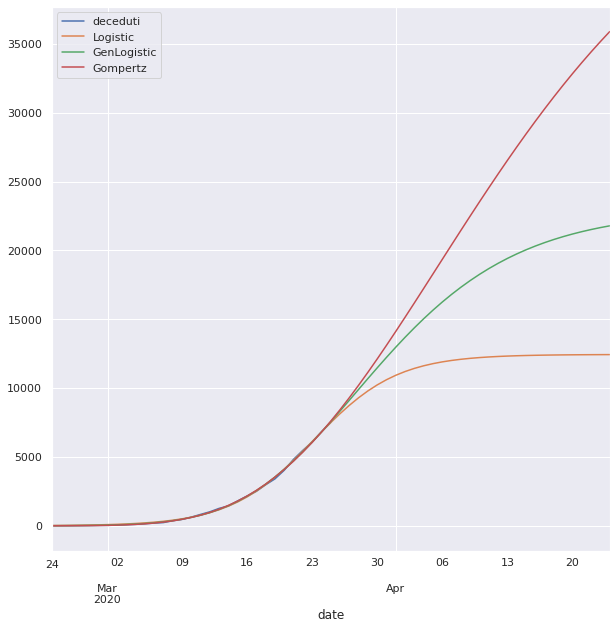

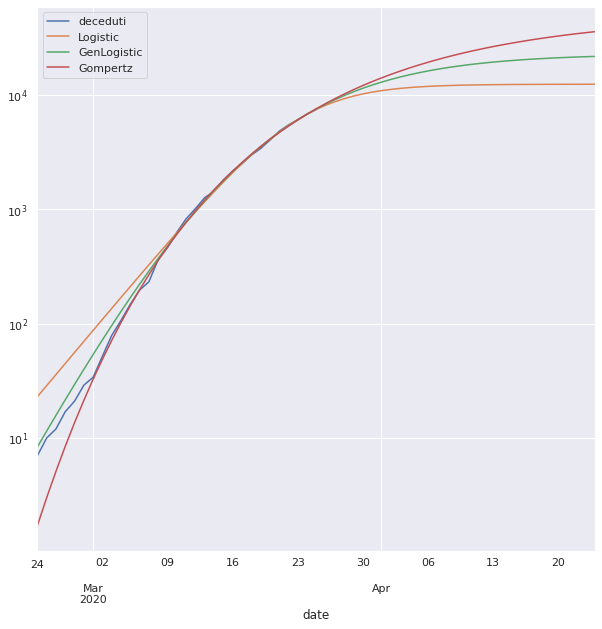

In [21]:
models = [logistic, gen_logistic, gompertz]
mod_df = utils.collect_models(models, df, "deceduti", 30)
utils.summaries(models, df)
mod_df.plot(); mod_df.plot(logy=True);

## Bias corrected infections 

The number of infections registered in Italy is considered highly biased given the relatively low number of tests given the infected. The high fatality rate supports this hypothesis as  the death toll is reasonably accurate.

For this reason the actual number of infected people can be estimated using more accurate fatality rates. The most accurate currently available is considered to be the south korean one, because of the large number of tested individuals. Fatality rates need to be adjusted by age and healthcare system. While the latter kind of correction is unfeasible (at least for me) the former one can be achived.

In order to proceed, fatalities by age is necessary (sources at the 25/03/2020: [Italy ISS](https://www.epicentro.iss.it/coronavirus/bollettino/Infografica_25marzo%20ITA.pdf), [South Korea CDC](https://www.cdc.go.kr/board/board.es?mid=a30402000000&bid=0030))

In [22]:
fatality_sk = [0, 0.11, 0.08, 0.47, 1.75, 6.25, 12.97]
deaths_it = [0, 17, 57, 220, 680, 2180, 2456+547]
age_index = pd.IntervalIndex.from_tuples([(0,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,120)], closed='left', name='age_range')
df_by_age = pd.DataFrame({'fatality': fatality_sk, 'deaths': deaths_it}, index=age_index)
df_by_age

,fatality,deaths
age_range,,
"[0, 30)",0.00,0
"[30, 40)",0.11,17
"[40, 50)",0.08,57
"[50, 60)",0.47,220
"[60, 70)",1.75,680
"[70, 80)",6.25,2180
"[80, 120)",12.97,3003


In [23]:
df_by_age['infections'] = (df_by_age.deaths * (100 / df_by_age.fatality)).fillna(0).astype(int)
df_by_age

,fatality,deaths,infections
age_range,,,
"[0, 30)",0.00,0,0
"[30, 40)",0.11,17,15454
"[40, 50)",0.08,57,71250
"[50, 60)",0.47,220,46808
"[60, 70)",1.75,680,38857
"[70, 80)",6.25,2180,34880
"[80, 120)",12.97,3003,23153


As the fatality is zero in the first age range, for it an estimate can be retrieved from the age-distribution of cases (5% source: [ISS 23/03/2020](https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_23-marzo%202020.pdf))

In [24]:
df_by_age.loc[20, "infections"] = int(df_by_age.infections.sum() / 95 * 5)
df_by_age

,fatality,deaths,infections
age_range,,,
"[0, 30)",0.00,0,12126
"[30, 40)",0.11,17,15454
"[40, 50)",0.08,57,71250
"[50, 60)",0.47,220,46808
"[60, 70)",1.75,680,38857
"[70, 80)",6.25,2180,34880
"[80, 120)",12.97,3003,23153


The ratio between total real infected and registered can be calculated as:

In [25]:
ratio = df_by_age.infections.sum() / df.loc["25-03-2020", "totale_casi"]

Here we project it over all the duration of the epidemic

In [26]:
est_df = pd.DataFrame({"registered": df.totale_casi, "estimated_real": (ratio * df.totale_casi).astype(int)}, index=df.index)
est_df.tail()

,registered,estimated_real
date,,
2020-03-21,53578,174685
2020-03-22,59138,192813
2020-03-23,63927,208427
2020-03-24,69176,225541
2020-03-25,74386,242528


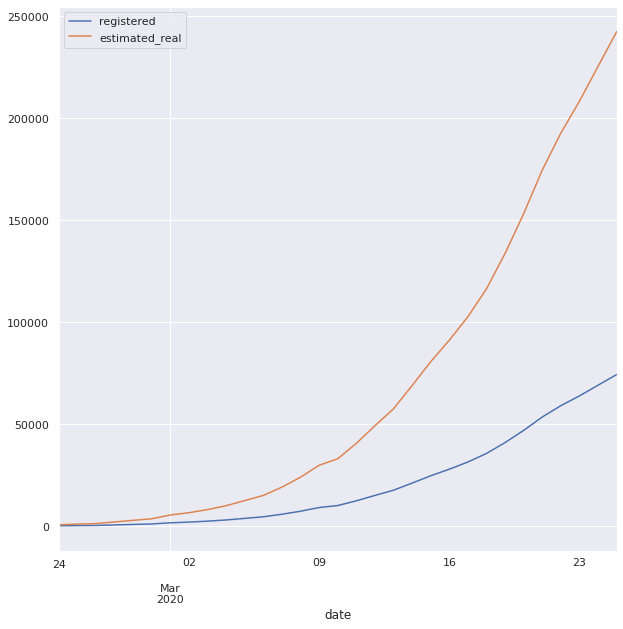

In [27]:
est_df.plot();